## Observations and Insights 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Check the number of mice.
print(len(mouse_study_df['Mouse ID']))

1893


In [34]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
# Drop any duplicate rows
clean_mouse_study = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

# Recheck the number of mice
print(len(clean_mouse_study))

1888


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summary_stats = clean_mouse_study.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
summary_stats.columns = ['tumor_mean', 'tumor_median', 'tumor_var', 'tumor_std','tumor_sem']
summary_stats = summary_stats.reset_index()
print(summary_stats)

  Drug Regimen  tumor_mean  tumor_median  tumor_var  tumor_std  tumor_sem
0    Capomulin   40.675741     41.557809  24.947764   4.994774   0.329346
1     Ceftamin   52.591172     51.776157  39.290177   6.268188   0.469821
2    Infubinol   52.884795     51.820584  43.128684   6.567243   0.492236
3     Ketapril   55.235638     53.698743  68.553577   8.279709   0.603860
4     Naftisol   54.331565     52.509285  66.173479   8.134708   0.596466
5      Placebo   54.033581     52.288934  61.168083   7.821003   0.581331
6     Propriva   52.382993     50.783528  43.220205   6.574208   0.526358
7     Ramicane   40.216745     40.673236  23.486704   4.846308   0.320955
8     Stelasyn   54.233149     52.431737  59.450562   7.710419   0.573111
9    Zoniferol   53.236507     51.818479  48.533355   6.966589   0.516398


## Bar and Pie Charts

In [ ]:
# Get the regimens and the mice per regimen
ID_regimen_dedupe = clean_mouse_study.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last')
regimen_mice = ID_regimen_dedupe['Drug Regimen'].value_counts()

regimens = list(regimen_mice.keys())
mice_per_regimen = list(regimen_mice)

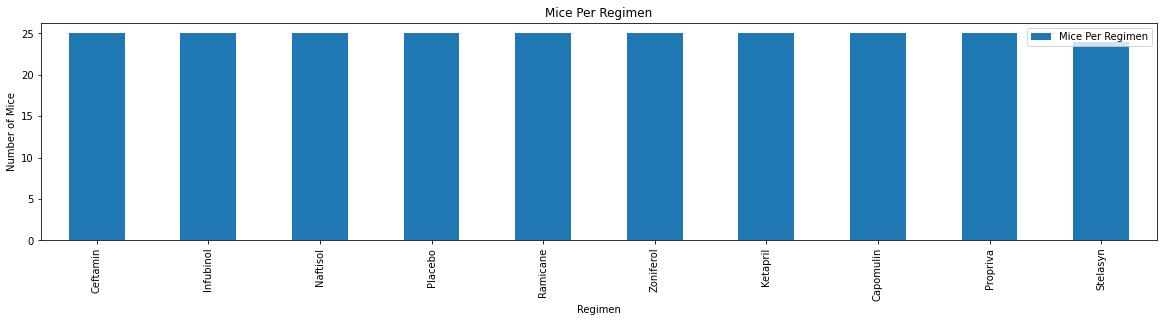

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
regimen_mice_df = pd.DataFrame({
    "Regimen":regimens,
    "Mice Per Regimen":mice_per_regimen
})
regimen_mice_df= regimen_mice_df.set_index("Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_mice_df.plot(kind="bar", figsize=(20,4))

# Set a title for the chart
plt.title("Mice Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

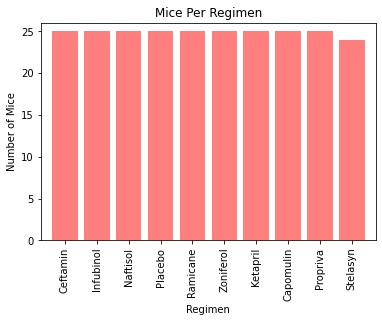

In [39]:
# Generate identical bar plot using pyplot instead of pandas.
# There should be a single bar per regimen

x_axis = np.arange(len(mice_per_regimen))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens,rotation='vertical')

plt.xlim(-0.75, len(regimens)-0.25)
plt.ylim(0, max(mice_per_regimen)+1)

plt.title("Mice Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mice_per_regimen, color='r', alpha=0.5, align="center")

In [ ]:
# Get the number of male and female mice used in the study
Male_Female = ID_regimen_dedupe["Sex"].value_counts()
sex = list(Male_Female.keys())
sex_dist = list(Male_Female)

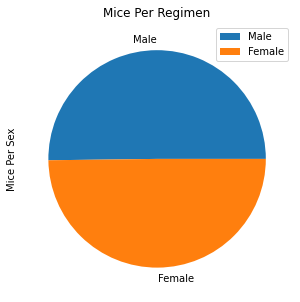

<Figure size 432x288 with 0 Axes>

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist_df = pd.DataFrame({
    "Sex":sex,
    "Mice Per Sex":sex_dist
})
sex_dist_df= sex_dist_df.set_index("Sex")

# Use DataFrame.plot() in order to create a bar chart of the data
plot = sex_dist_df.plot.pie(y="Mice Per Sex", figsize=(5, 5))

# Set a title for the chart
plt.title("Distribution of Sex of Mice Throughout Study")

plt.show()
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x202928f22e8>,
 [Text(-1.0999781124353174, -0.006939175976765592, 'Male'),
  Text(1.0999781124353174, 0.006939175976765457, 'Female')],
 [Text(-0.5999880613283548, -0.003785005078235777, '50.2%'),
  Text(0.5999880613283548, 0.0037850050782357036, '49.8%')])

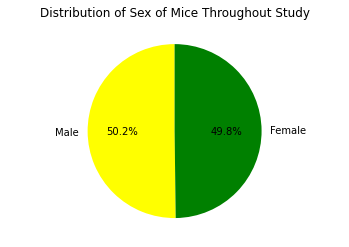

In [57]:
# Generate identical pie plot using pyplot

explode = (0,0)
colors = ["yellow","green"]

# Set a title for the chart
plt.title("Distribution of Sex of Mice Throughout Study")

# Tell matplotlib to create a pie chart based upon the above data
plt.axis("equal")
plt.pie(sex_dist, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)


## Quartiles, Outliers and Boxplots

In [64]:
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:
# Create dataframe with the information at the last timepoint for each mouse ID
ID_Timepoint = clean_mouse_study.sort_values(by=['Timepoint'])
ID_Last_Timepoint = ID_Timepoint.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last')

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Final_TumorVol_Regimens = ID_Last_Timepoint.loc[(ID_Last_Timepoint['Drug Regimen']=="Capomulin") | 
                                                 (ID_Last_Timepoint['Drug Regimen']=="Ramicane") |
                                                 (ID_Last_Timepoint['Drug Regimen']=="Infubinol")|
                                                 (ID_Last_Timepoint['Drug Regimen']=="Ceftamin")] 

Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights